In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Attribute DataSet.xlsx')
df.drop(columns=["Dress_ID"], inplace=True)
df.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [ ]:
df['Price'].replace(['low','Average', 'high'], ['Low','Medium', 'High'], inplace=True)
df['Size'].replace(['s','small'], ['S','S'], inplace=True)
df['Style'].replace(['sexy'], ['Sexy'], inplace=True)
df['FabricType'].replace(['shiffon', 'sattin', 'wollen'], ['chiffon', 'satin', 'woolen'], inplace=True)
df['Season'].replace(['Automn','winter'], ['Autumn','Winter'], inplace=True)
df['SleeveLength'].replace(['thressqatar'], ['threequarter'], inplace=True)
df['Material'].replace(['shiffon'], ['chiffonfabric'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Price           498 non-null    object 
 2   Rating          500 non-null    float64
 3   Size            500 non-null    object 
 4   Season          498 non-null    object 
 5   NeckLine        497 non-null    object 
 6   SleeveLength    498 non-null    object 
 7   waiseline       413 non-null    object 
 8   Material        372 non-null    object 
 9   FabricType      234 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [ ]:
df.isna().sum()*100/len(df)

Style              0.0
Price              0.4
Rating             0.0
Size               0.0
Season             0.4
NeckLine           0.6
SleeveLength       0.4
waiseline         17.4
Material          25.6
FabricType        53.2
Decoration        47.2
Pattern Type      21.8
Recommendation     0.0
dtype: float64

In [ ]:
cols = ['Price', 'Season', 'NeckLine', 'SleeveLength']

for col in cols:
    df[col].fillna(df[col].mode(), inplace=True)

In [ ]:
df.dropna(axis=0, subset=['waiseline', 'Material','FabricType','Decoration','Pattern Type'], inplace=True)
df.isna().sum()

Style             0
Price             0
Rating            0
Size              0
Season            0
NeckLine          0
SleeveLength      0
waiseline         0
Material          0
FabricType        0
Decoration        0
Pattern Type      0
Recommendation    0
dtype: int64

In [ ]:
df['Rating'].describe()

count    99.000000
mean      3.503030
std       2.005678
min       0.000000
25%       3.800000
50%       4.600000
75%       4.800000
max       5.000000
Name: Rating, dtype: float64

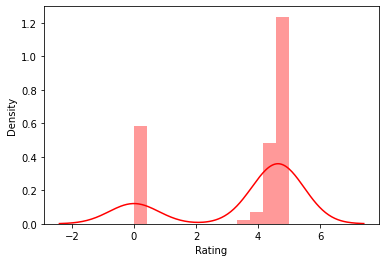

In [ ]:
sns.distplot(df['Rating'], color='r')
plt.show()

In [ ]:
cols = df.columns.tolist()
cols.remove("Rating")
df_cat = df[cols].copy()

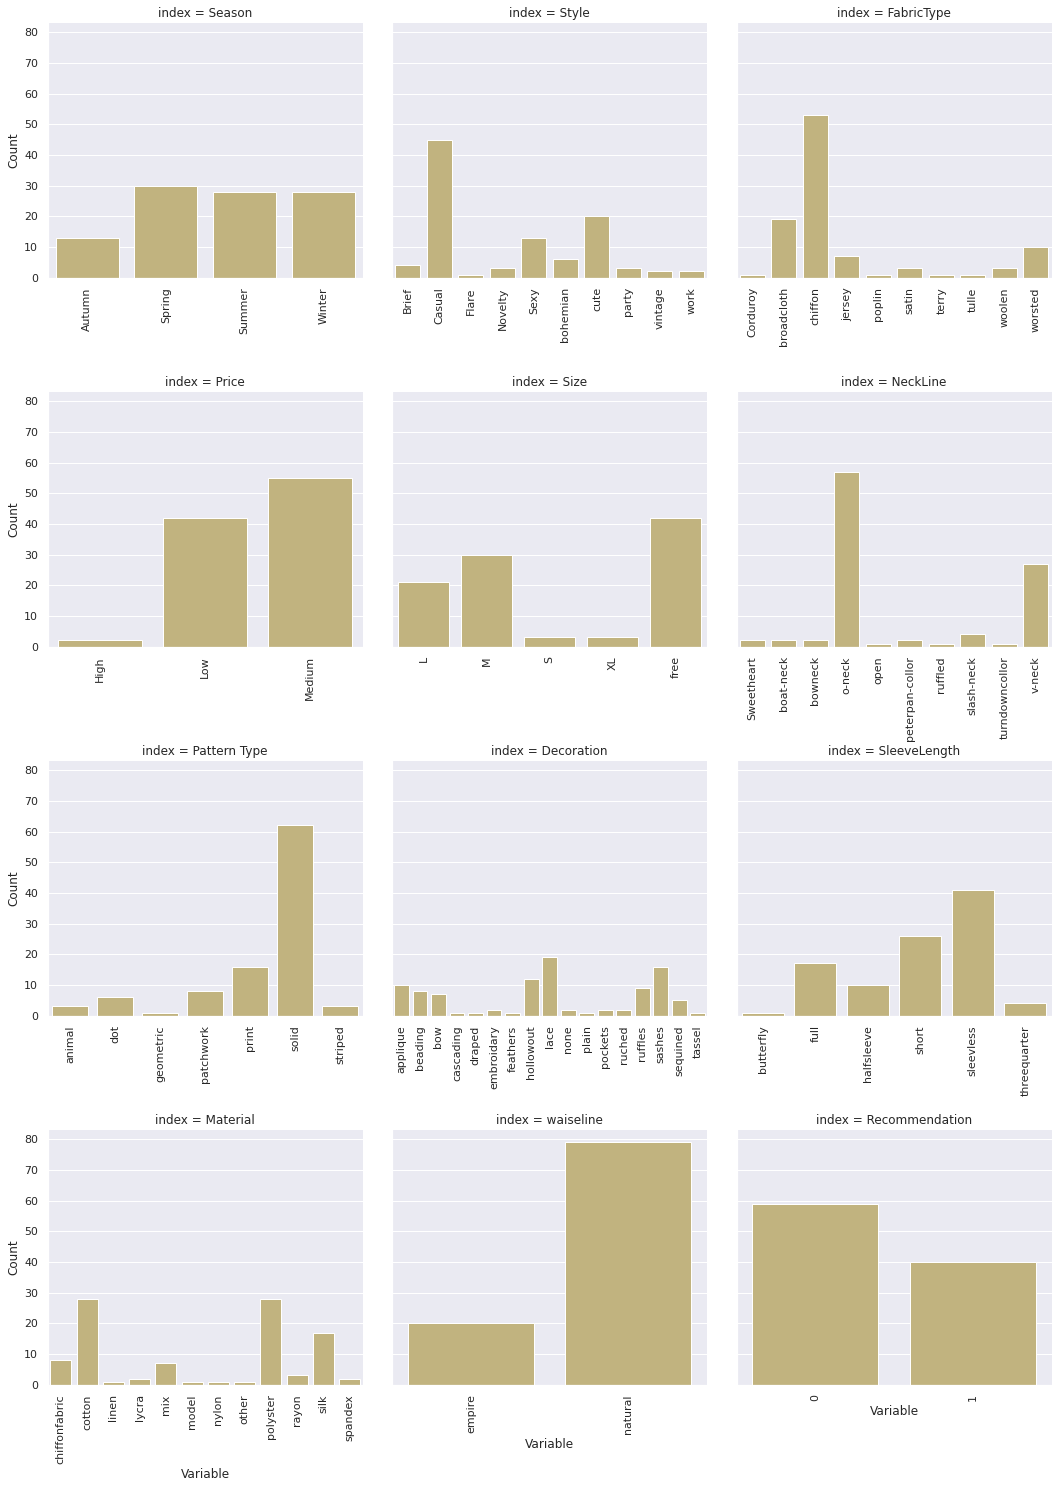

In [ ]:
counts = df_cat.apply(pd.value_counts).T
melted = counts.reset_index().melt(
    id_vars='index',
    var_name='Variable',
    value_name='Count',
).dropna()

sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.catplot(
    data=melted,
    kind='bar',
    col='index',
    y='Count',
    x='Variable',
    col_wrap=3,
    sharex=False,
    color='y'
)
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace = 0.45)
plt.show()

In [ ]:
pd.melt(df[['Size', 'Recommendation']], id_vars="Size")

,Size,variable,value
0,L,Recommendation,1
1,M,Recommendation,0
2,free,Recommendation,1
3,free,Recommendation,0
4,free,Recommendation,0
...,...,...,...
94,M,Recommendation,0
95,free,Recommendation,0
96,free,Recommendation,1
97,L,Recommendation,1


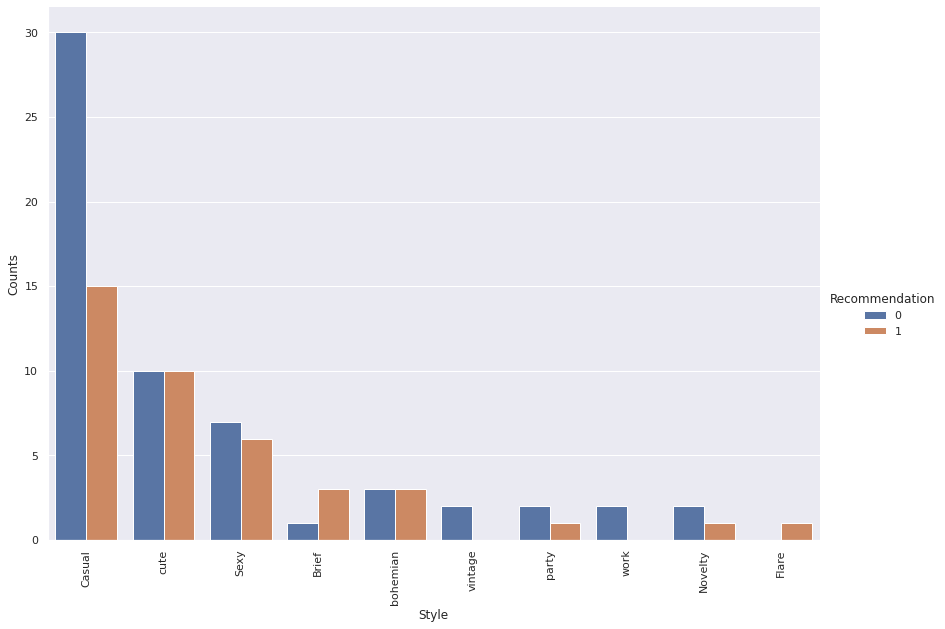

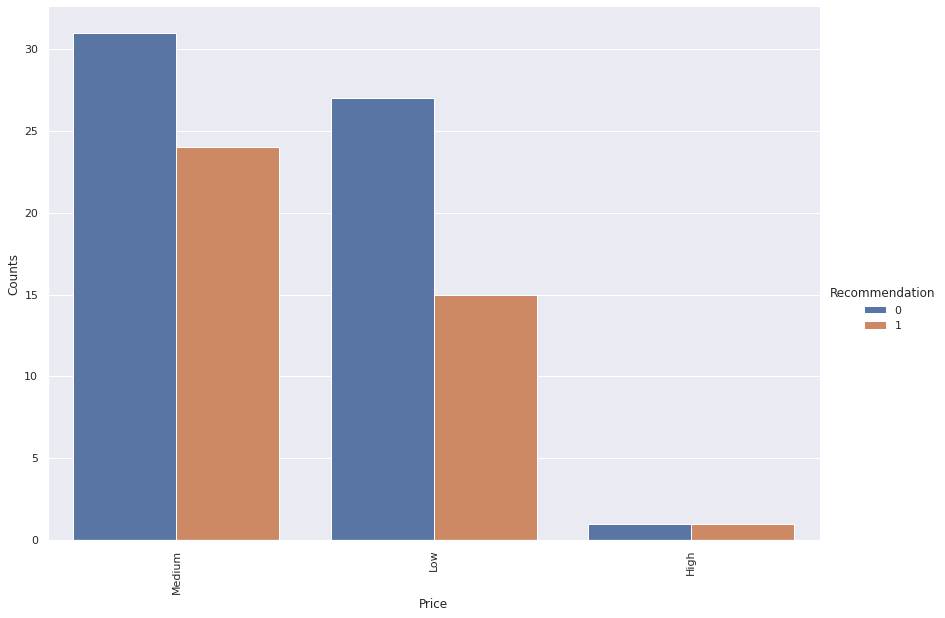

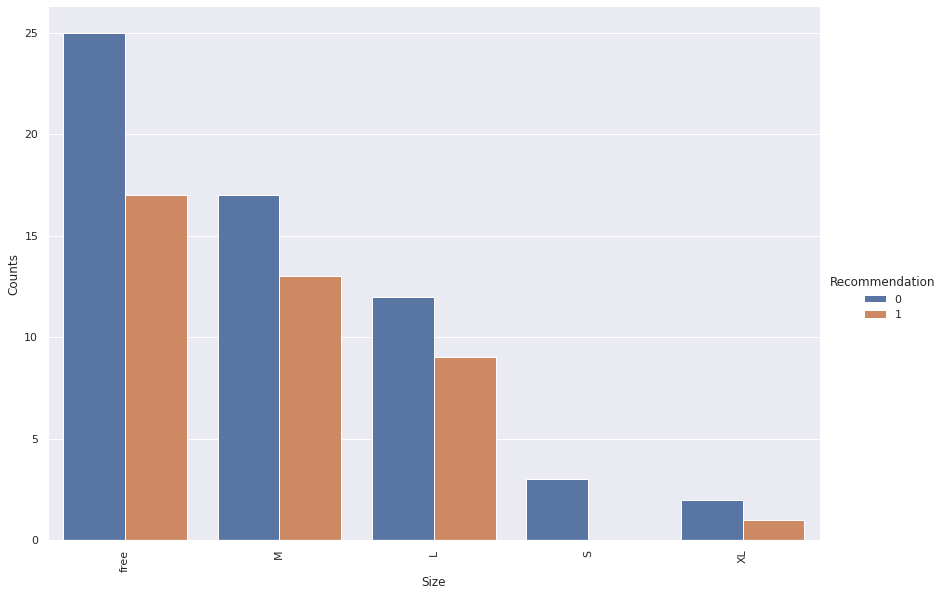

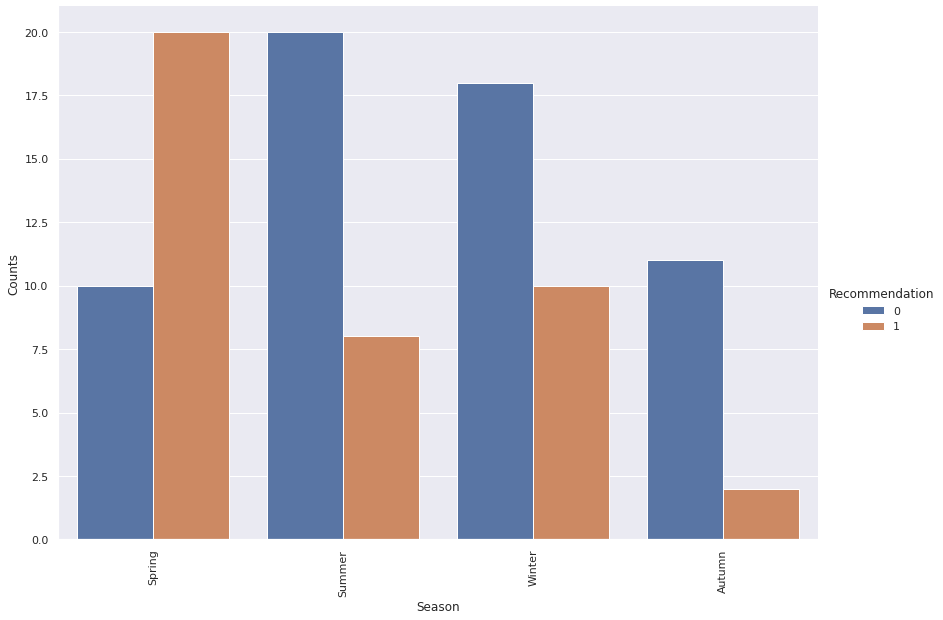

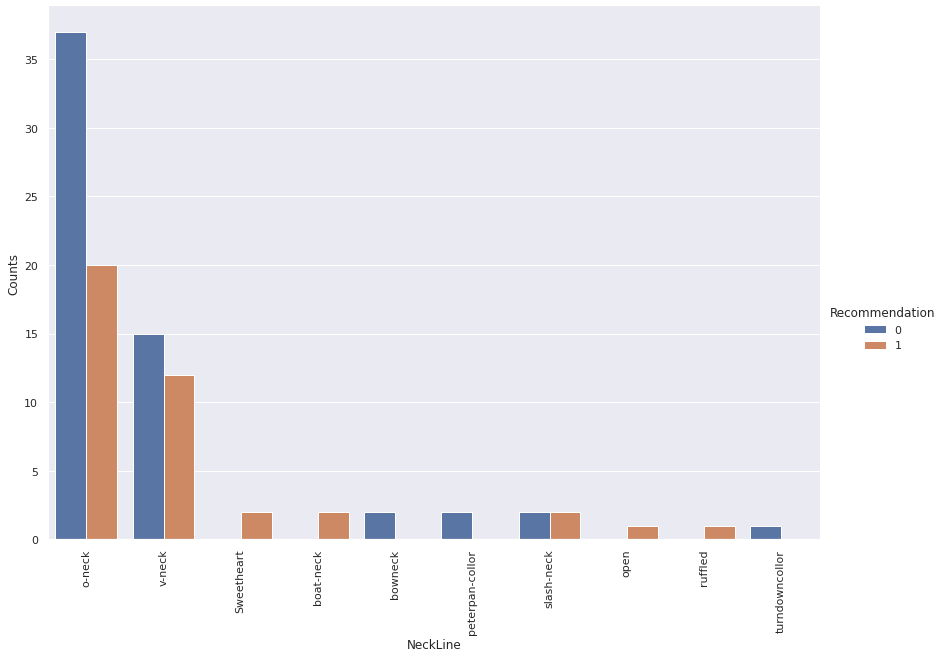

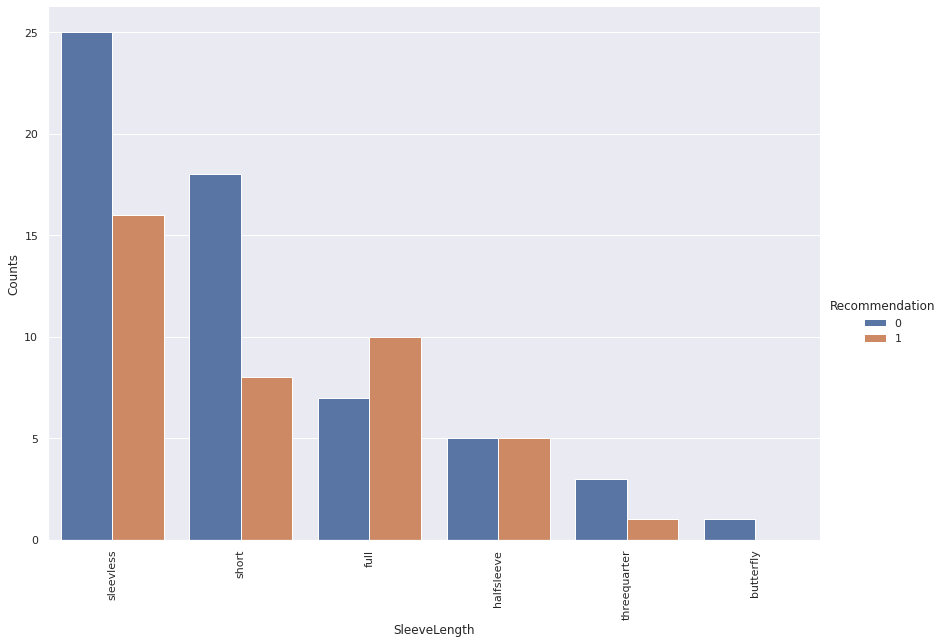

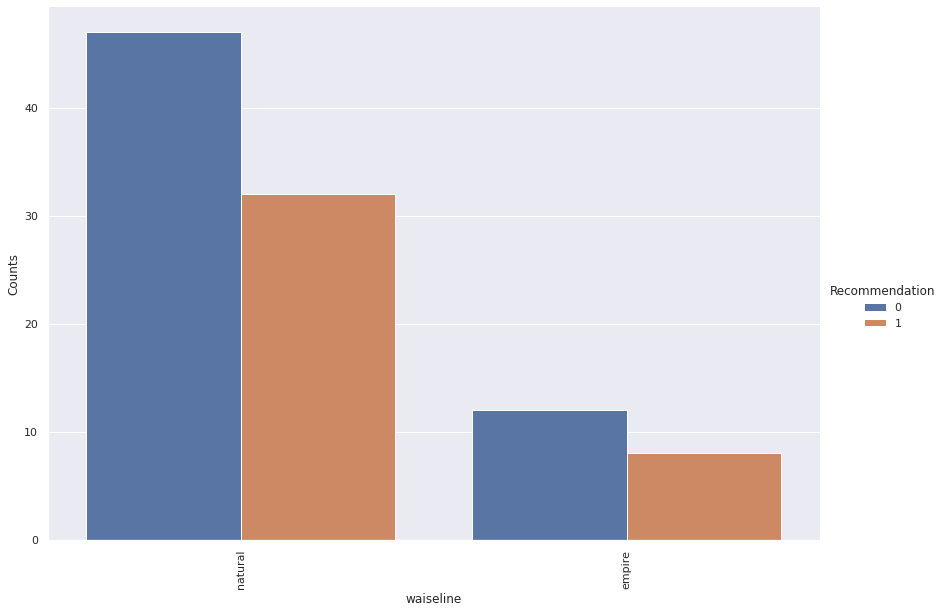

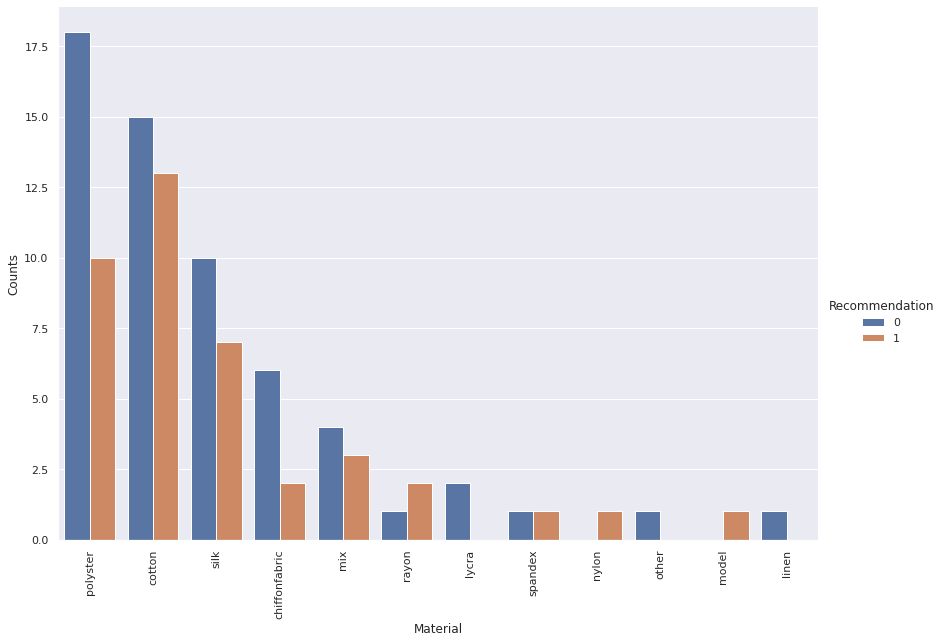

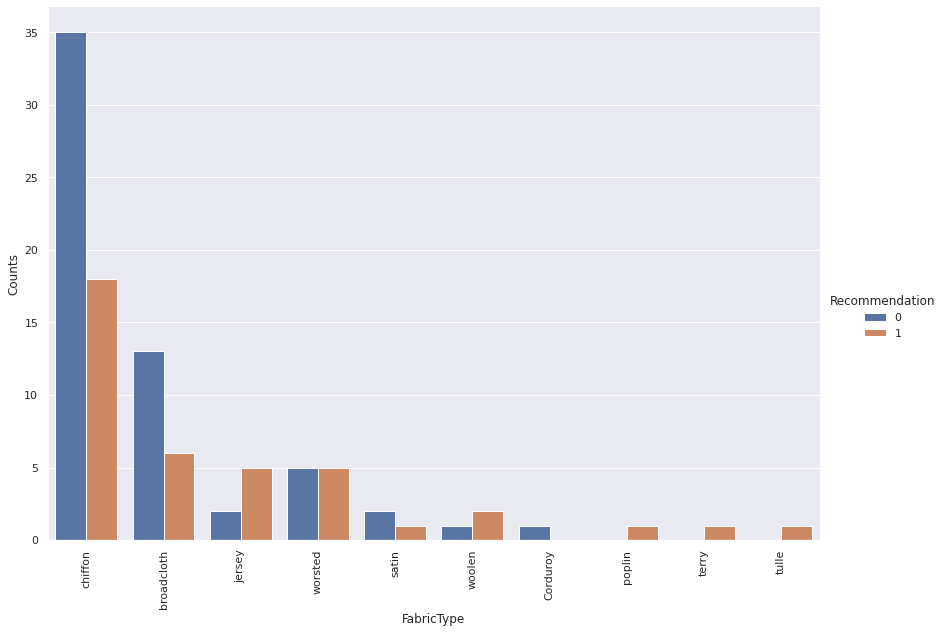

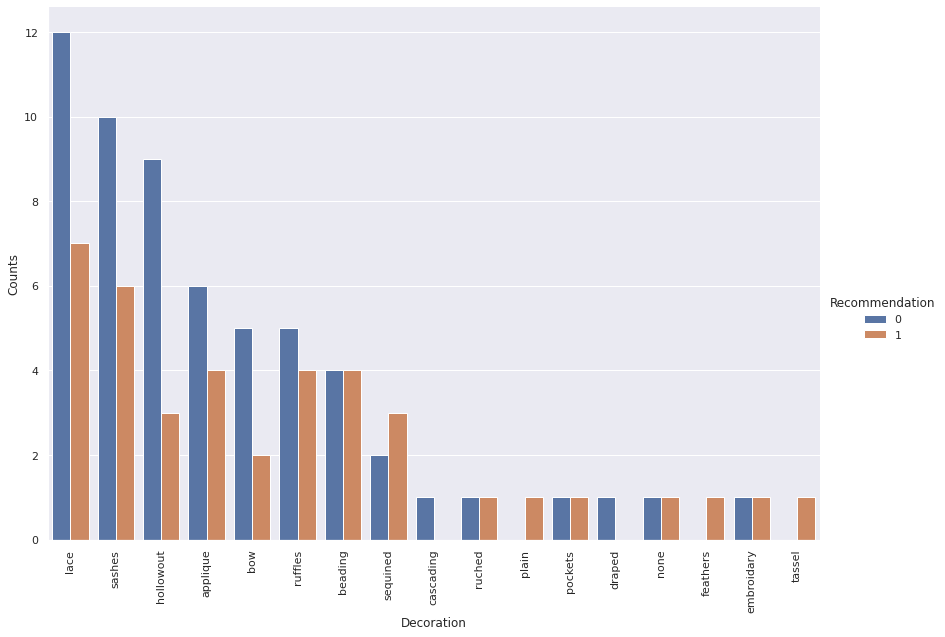

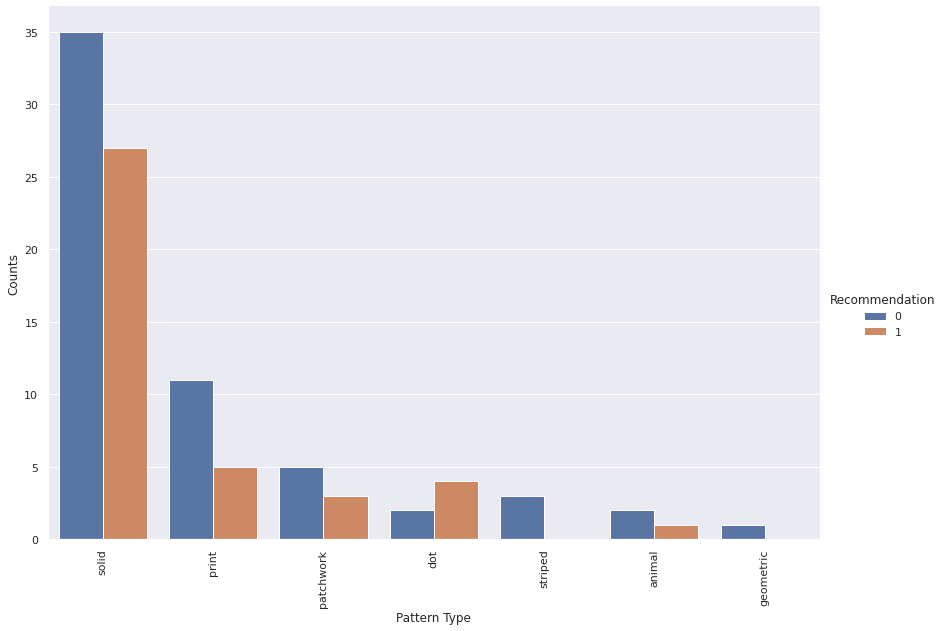

In [ ]:
for col in cols:
    if col not in ['Rating', 'Recommendation']:
        df1 = df[[col, 'Recommendation']].value_counts().reset_index()
        df1['Counts'] = df1[0]
        sns.catplot(x = col, y='Counts', 
                    hue = 'Recommendation',data=df1, 
                    kind='bar', height=8.27, aspect=11.7/8.27)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0]) 

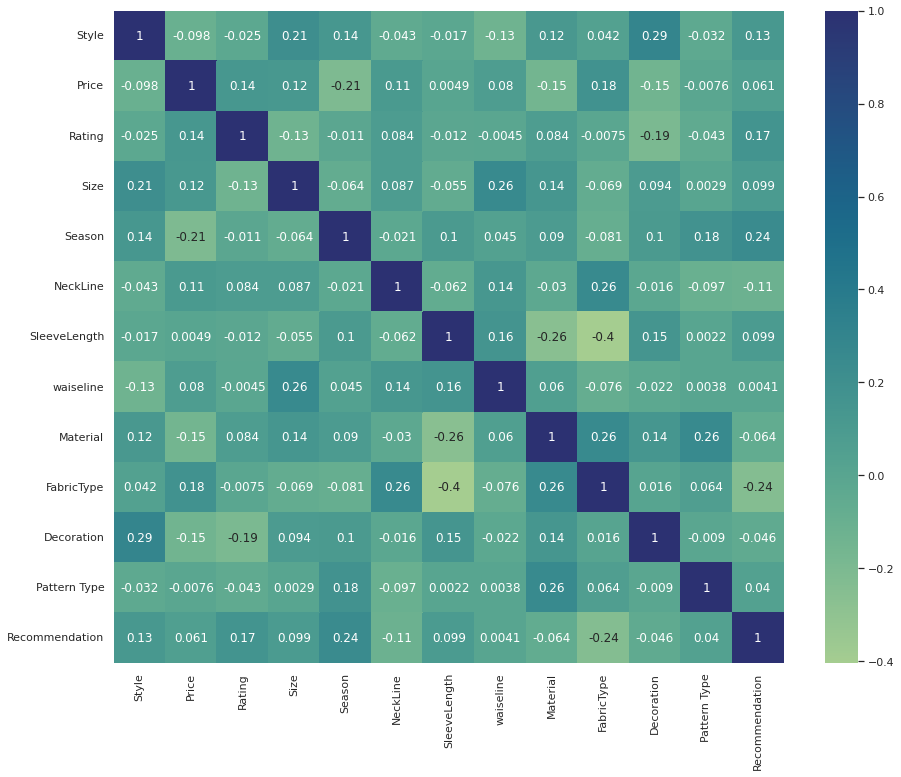

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df.corr(), cmap="crest", annot=True)
plt.show()

In [ ]:
X = df.drop('Recommendation',axis=1)
y = df['Recommendation']

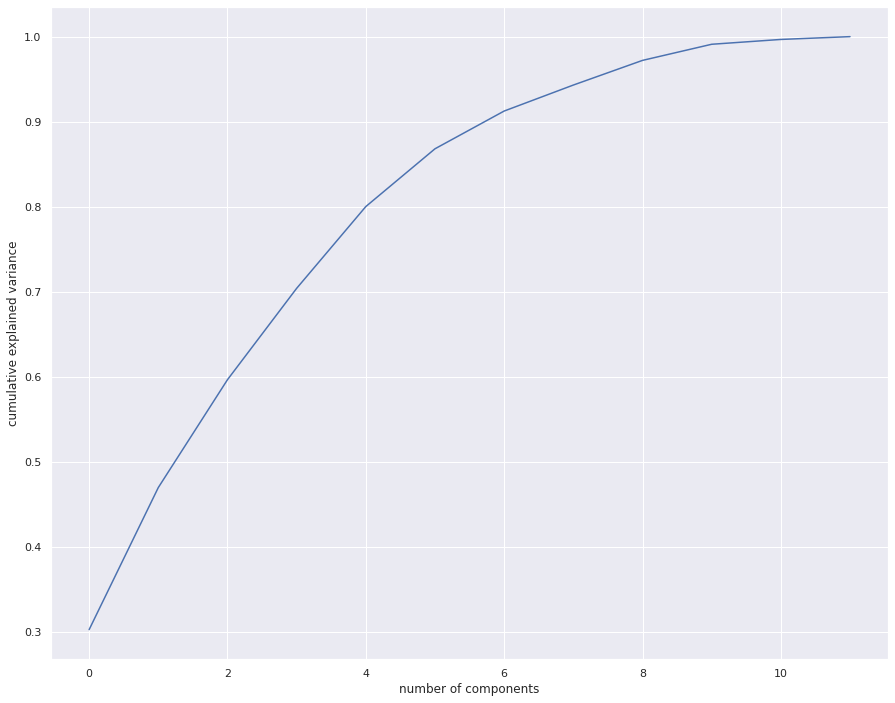

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca = PCA(5)
X_pca = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = 1-clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



In [ ]:
from sklearn.svm import SVC

clf = SVC(random_state=42, kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.57      0.89      0.70         9

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20



In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.50      1.00      0.67         9

    accuracy                           0.55        20
   macro avg       0.75      0.59      0.49        20
weighted avg       0.78      0.55      0.47        20

